# Test 2b - Merge, Aggregate, Visualize

banner id: 904366627
verification code: 11abb8eb4cb5


## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904366627
verification code:  11abb8eb4cb5
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
paste your banner id and verification code here...
banner id:          904366627
verification code:  11abb8eb4cb5

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2712 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1001,2025-11-11 06:09:00,Campus,114,1.0,4.08,Credit,False
1,1000,2025-11-11 06:14:00,Downtown,104,2.0,5.44,Credit,True
2,1003,2025-11-11 06:29:00,Downtown,116,1.0,9.06,Mobile,True
3,1002,2025-11-11 06:57:00,Downtown,105,1.0,4.30,Mobile,True
4,1004,2025-11-11 07:05:00,Downtown,103,1.0,5.06,Credit,True


In [ ]:
# Products catalog
products

## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [8]:
# Task 1: use isna(), nunique(), min/max on timestamp
# Missing values in each column
print("Missing values per column:")
print(sales.isna().sum())
print()

print("-" * 40)

# Number of unique product IDs
unique_sales_ids   = sales["product_id"].nunique()
unique_catalog_ids = products["product_id"].nunique()

print(f"Unique product_ids in sales data:   {unique_sales_ids}")
print(f"Unique product_ids in catalog data: {unique_catalog_ids}")
print()

print("-" * 40)

# Earliest and latest transaction timestamps
earliest_tx = sales["timestamp"].min()
latest_tx   = sales["timestamp"].max()

print(f"Earliest transaction: {earliest_tx}")
print(f"Latest transaction:   {latest_tx}")


Missing values per column:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          5
revenue           5
payment_method    0
loyalty_member    0
dtype: int64

----------------------------------------
Unique product_ids in sales data:   21
Unique product_ids in catalog data: 18

----------------------------------------
Earliest transaction: 2025-11-11 06:09:00
Latest transaction:   2025-11-24 21:48:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [9]:
# Task 2: merge sales with products info
sales_merged = sales.merge(
    products,
    on="product_id",      # match rows using product_id
    how="left"           # keep all sales rows
)

print("Original sales shape:", sales.shape)
print("Merged shape:", sales_merged.shape)
sales_merged.head()



Original sales shape: (2712, 8)
Merged shape: (2712, 11)


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1001,2025-11-11 06:09:00,Campus,114,1.0,4.08,Credit,False,Cinnamon Roll,Pastry,1.4
1,1000,2025-11-11 06:14:00,Downtown,104,2.0,5.44,Credit,True,Americano,Coffee,1.0
2,1003,2025-11-11 06:29:00,Downtown,116,1.0,9.06,Mobile,True,Veggie Wrap,Sandwich,2.8
3,1002,2025-11-11 06:57:00,Downtown,105,1.0,4.30,Mobile,True,Cold Brew,Coffee,1.5
4,1004,2025-11-11 07:05:00,Downtown,103,1.0,5.06,Credit,True,Latte,Coffee,1.9


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [ ]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [16]:
# Task 4: create profit column, then groupby with .agg()

# 1. Profit for each transaction
sales_merged["profit"] = sales_merged["revenue"] - (
    sales_merged["cost"] * sales_merged["quantity"]
)

# 2. Aggregate by category
profit_by_category = (
    sales_merged
        .groupby("category", as_index=False)
        .agg(
            total_profit=("profit", "sum"),
            num_transactions=("transaction_id", "count"),
        )
        .sort_values("total_profit", ascending=False)
)

profit_by_category


,category,total_profit,num_transactions
2,Sandwich,4281.90,603
0,Coffee,2431.10,981
1,Pastry,1637.44,549
3,Tea,863.47,567


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [11]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

# (If profit column already created in Task 4, you can skip this line)
sales_merged["profit"] = sales_merged["revenue"] - sales_merged["cost"] * sales_merged["quantity"]

profit_by_cat_loc = (
    sales_merged
        .groupby(["category", "location"])
        .agg(
            total_profit=("profit", "sum"),
            avg_profit_per_txn=("profit", "mean"),
            num_transactions=("transaction_id", "count")
        )
        .reset_index()          # turn groupby index back into normal columns
)

profit_by_cat_loc


,category,location,total_profit,avg_profit_per_txn,num_transactions
0,Coffee,Campus,1075.33,2.060019,524
1,Coffee,Downtown,1197.45,3.094186,388
2,Coffee,Suburb,158.32,2.294493,69
3,Pastry,Campus,574.62,2.466180,235
4,Pastry,Downtown,679.90,3.756354,183
5,Pastry,Suburb,382.92,2.923053,131
6,Sandwich,Campus,779.59,5.413819,144
7,Sandwich,Downtown,2567.96,8.230641,314
8,Sandwich,Suburb,934.35,6.443793,145
9,Tea,Campus,217.82,1.223708,178


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

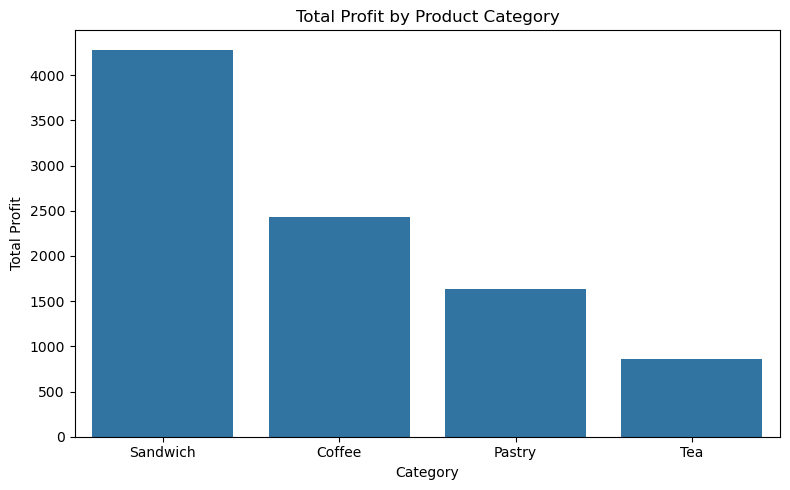

In [17]:
# Task 6: Visualize Category Profitability

plt.figure(figsize=(8, 5))

sns.barplot(
    data=profit_by_category,   # table from Task 4
    x="category",
    y="total_profit"
)

plt.title("Total Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

q1 

If I do not check the merge, sales rows may not match the right product.
Some rows may have missing name, category, or cost.
Then the profit numbers will be wrong.
The shop owner could make bad choices from wrong results.
"""

q2

By category only:
- I see which product type makes the most total profit.
- Example: Sandwich > Coffee > Pastry > Tea.

By category AND location:
- I see which product type works best in each store.
- I can compare Downtown, Campus, and Suburb.
- This helps with store-level decisions, not just overall.
"""

q3

- Sandwiches give the highest total profit (about 4282).
- Coffee is second (about 2431).
- Pastry is third (about 1637).
- Tea has the lowest profit (about 863).
- Food (sandwiches and pastries) plus coffee make most of the money.
- Tea is weak in all locations.
"""

q4

Main advice:
- Focus on selling more sandwiches, especially in the busy store.
- Keep sandwiches in stock.
- Use sandwich + coffee combos.
- Ask staff to suggest sandwiches to customers.

Extra analysis:
- Look at profit by time of day and day of week.
- Compare profit for loyalty members vs non-members.
- For tea, test price changes or bundles to see if it can do better.
"""

print(q1)
print(q2)
print(q3)
print(q4)


## Bonus: Time-Based Analysis (Optional)

### Your Findings

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

**Bonus: Time-based question**

**Question:**  
Do weekends (Saturday and Sunday) make more total profit than weekdays?

**What I did (my analysis):**  
- I used the `timestamp` column to find the day of the week for each sale.  
- I made a new column called `is_weekend` that marks each sale as weekend or not.  
- Then I grouped the data by `is_weekend` and added up the profit and the number of transactions.

**What I found (fill in from your table):**  
- Weekends: total profit = [weekend_total], number of sales = [weekend_txn].  
- Weekdays: total profit = [weekday_total], number of sales = [weekday_txn].  
- So in my data, **[weekends / weekdays]** are **[more / less]** profitable than the other.

(I will replace the values in brackets with the real numbers from my table.)


In [19]:
# Bonus: time-based analysis – weekdays vs weekends

# 1. Make sure timestamp is datetime
sales_merged["timestamp"] = pd.to_datetime(sales_merged["timestamp"])

# 2. Create a weekend flag (True = weekend, False = weekday)
sales_merged["is_weekend"] = sales_merged["timestamp"].dt.dayofweek >= 5  # 5 = Sat, 6 = Sun

# 3. Group by weekend / weekday and summarize profit
profit_by_daytype = (
    sales_merged
        .groupby("is_weekend", as_index=False)
        .agg(
            total_profit=("profit", "sum"),
            avg_profit_per_txn=("profit", "mean"),
            num_transactions=("transaction_id", "count"),
        )
)

profit_by_daytype


,is_weekend,total_profit,avg_profit_per_txn,num_transactions
0,False,7697.12,3.417904,2271
1,True,1516.79,3.462991,441


## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.